In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('Data/titanic.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# xử lí thằng 'Name'

In [49]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- để ý rằng trong mỗi cái tên sẽ thứ vị của người đó, chẳng hạn như Mrs, Miss, Dona,...
- ->  cần trích xuất những đại từ có trong tên

In [50]:
import re
df['Title'] = df.Name.apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))
df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

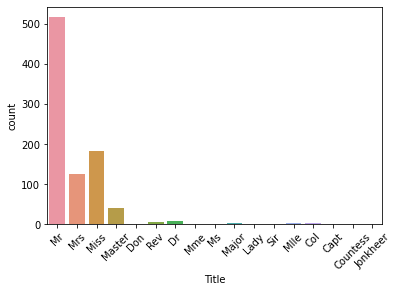

In [51]:
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45);

- theo địnhk nghĩa thì 'Mlle' & 'Ms' là 'Miss'
- tương tự như thế thì 'Mme' & 'Mrs' là 'Mrs'
- ...

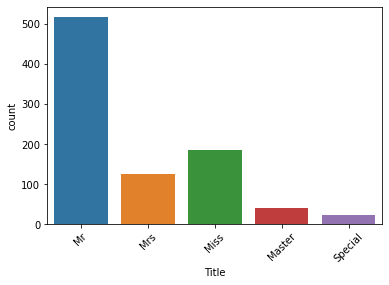

In [52]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

In [53]:
df = df.drop(['Name', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


# xử lí thằng 'Cabin'

- có một dữ liệu Nan trong cột này
- -> tạo cột mới 'Cabin' với giá trị là 'false' nếu dòng đó là nan và ngược lại là true


In [54]:
df['Has_Cabin'] = ~df['Cabin'].isnull()

In [55]:
# và sau đó sẽ drop bớt đi
df = df.drop(['Cabin', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,1,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True
4,0,3,male,35.0,0,0,8.0500,S,Mr,False


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    object 
 8   Title      891 non-null    object 
 9   Has_Cabin  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [57]:
# fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Title      891 non-null    object 
 9   Has_Cabin  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,1,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True
4,0,3,male,35.0,0,0,8.0500,S,Mr,False


- Tiếp theo, bạn muốn phân loại dữ liệu số, vì bạn có nhiều độ tuổi và giá vé. Tuy nhiên, có thể có những biến động trong những con số không phản ánh các mẫu trong dữ liệu, có thể là nhiễu. Đó là lý do tại sao bạn sẽ đặt những người trong một độ tuổi hoặc giá vé nhất định vào cùng một thùng. Bạn có thể thực hiện việc này bằng cách sử dụng hàm pandas qcut () để phân loại dữ liệu số của bạn:

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



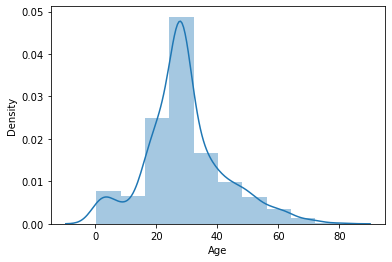

In [59]:
# visualize age
sns.distplot(df['Age'], bins=10, kde=True);

In [60]:
import plotly.express as px

fig = px.pie(df, values='Age', names='Title' ,title='Age distribution')
fig.show()

In [61]:
df.Age.value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

In [62]:
len(df.Age.value_counts())

88

In [63]:
fig = px.bar(df, y='Age' ,title='Age distribution')
fig.show()

In [64]:
df['qCutAge'] = pd.qcut(df.Age, q=4, labels=False )
#df['CatFare']= pd.qcut(df.Fare, q=4, labels=False)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,qCutAge
0,0,3,male,22.0,1,0,7.2500,S,Mr,False,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True,3
2,1,3,female,26.0,0,0,7.9250,S,Miss,False,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,False,2


<AxesSubplot:>

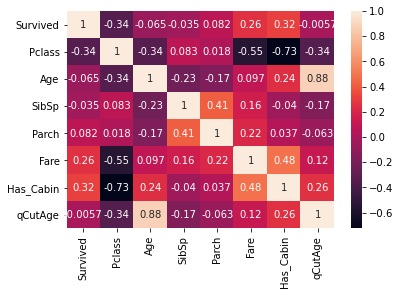

In [67]:
sns.heatmap(df.corr() ,annot=True)

In [42]:
fig = px.scatter(df, y='qCutAge', x='Age', color='Survived')
fig.show();

In [22]:
df.Age.loc[df.Survived == 0]

0      22.0
4      35.0
5      28.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    28.0
890    32.0
Name: Age, Length: 549, dtype: float64

In [44]:
df['qCutAge_0'] = pd.qcut(df.Age.loc[df.Survived == 0], q=4, labels=False )
fig = px.scatter(df, y='qCutAge_0', x='Age', color='Survived')
fig.show();

In [45]:
df['qCutAge_1'] = pd.qcut(df.Age.loc[df.Survived == 1], q=4, labels=False )
fig = px.scatter(df, y='qCutAge_1', x='Age', color='Survived')
fig.show();

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,qCutAge,qCutAge_0,qCutAge_1
0,0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0.0,NaN
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,NaN,3.0
2,1,3,female,26.0,0,0,7.9250,S,Miss,False,1,NaN,1.0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True,2,NaN,2.0
4,0,3,male,35.0,0,0,8.0500,S,Mr,False,2,2.0,NaN


In [ ]:
df_0 = df[df.Survived == 0]


In [31]:
df.Age.values

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [30]:
df.CatAge.values

array([0, 3, 1, 2, 2, 1, 3, 0, 1, 0, 0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 2, 2,
       0, 1, 0, 3, 1, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 0, 0, 0, 3, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 3, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1,
       1, 1, 2, 0, 3, 1, 3, 1, 3, 1, 2, 2, 1, 1, 0, 2, 3, 1, 0, 1, 3, 1,
       3, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 1, 2, 2, 3, 0, 1, 1, 1, 3, 2, 0,
       3, 2, 1, 1, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 3, 3, 0, 3, 3,
       1, 3, 0, 2, 1, 1, 3, 3, 1, 0, 0, 0, 1, 3, 1, 1, 3, 0, 0, 0, 3, 0,
       1, 3, 2, 3, 1, 1, 0, 0, 0, 1, 1, 3, 3, 3, 2, 0, 0, 0, 3, 3, 1, 3,
       1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 3, 1, 2, 0, 2, 1, 2, 1, 3, 2, 2,
       0, 1, 3, 1, 3, 0, 0, 0, 0, 1, 2, 2, 3, 0, 1, 1, 3, 0, 0, 2, 1, 1,
       2, 0, 2, 3, 1, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 2, 3, 1, 0, 3, 3,
       1, 3, 0, 1, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 0, 2, 3, 1, 0, 0, 1, 2,
       2, 0, 3, 0, 1, 0, 3, 1, 1, 1, 1, 0, 1, 3, 1,

In [30]:
df = df.drop(['Age', 'Fare'], axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,0,3,male,1,0,S,Mr,False,0,0
1,1,1,female,1,0,C,Mrs,True,3,3
2,1,3,female,0,0,S,Miss,False,1,1
3,1,1,female,1,0,S,Mrs,True,2,3
4,0,3,male,0,0,S,Mr,False,2,1


In [33]:
# Tính tổng số lượng thành viên gia đình trên con tàu
df['FamilySize'] = df['SibSp'] + df['Parch']

In [34]:
df = df.drop(['SibSp', 'Parch'], axis=1)
df.head()

,Survived,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare,FamilySize
0,0,3,male,S,Mr,False,0,0,1
1,1,1,female,C,Mrs,True,3,3,1
2,1,3,female,S,Miss,False,1,1,0
3,1,1,female,S,Mrs,True,2,3,1
4,0,3,male,S,Mr,False,2,1,0


In [35]:
# Transform data
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Survived,Pclass,Has_Cabin,CatAge,CatFare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,False,0,0,1,1,0,1,0,1,0,0
1,1,1,True,3,3,1,0,0,0,0,0,1,0
2,1,3,False,1,1,0,0,0,1,1,0,0,0
3,1,1,True,2,3,1,0,0,1,0,0,1,0
4,0,3,False,2,1,0,1,0,1,0,1,0,0


- Đến đây là bạn đã có một bộ data hoàn chỉnh để bước vào model rồi